In [1]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm
import re
import pdb

In [2]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.50.post1', '1.0.1.post2')

In [3]:
torch.cuda.set_device(0)

In [4]:
!pwd

/home/gaurav/PycharmProjects/language-classifier/classification


In [5]:
path = Path('/home/gaurav/PycharmProjects/language-classifier/classification')

In [6]:
!ls

all_language_classification_model.ipynb  data_lm_export.pkl  export.pkl  models
all_languages.csv			 data_save.pkl	     inltk


In [33]:
df = pd.read_csv(path/'all_languages.csv')
df.tail()

,text,label
2185657,ई बनि गेल तँ अन्ततः एकरा एकर वर्तमान नाम रोयल ...,maithili
2185658,ल।\nसङ्ग्रहालय के पुरालेख मे इकाई के नामावलीसभ...,maithili
2185659,अछि कि रेजिमेन्ट के सेवाकर्मी केवल मोनमाउथशायर...,maithili
2185660,रूटसभक आकर्षित करैत छल। सङ्ग्रहालय आ एकर पुराल...,maithili
2185661,ल गेल छल। सङ्गठनक लक्ष्य युद्ध स्मारकसभक संरक्...,maithili


In [34]:
len(df['label'].unique())

13

In [35]:
df['label'].unique()

array(['hindi', 'panjabi', 'sanskrit', 'marathi', 'malyalam', 'gujarati', 'kannada', 'nepali', 'bengali', 'odia',
       'tamil', 'urdu', 'maithili'], dtype=object)

In [36]:
df.shape

(2185662, 2)

In [37]:
df[df['text'].isnull()].shape

(0, 2)

In [38]:
label_cols = list(range(1,df.shape[1]))

In [39]:
print(label_cols)

[1]


In [14]:
# label_cols = [1]

In [40]:
id_to_col = list(df.columns)

In [41]:
col_to_id = {}
for i, col in enumerate(id_to_col):
    col_to_id[col] = i

In [7]:
from inltk.tokenizer import AllLanguageTokenizer

In [8]:
AllLanguageTokenizer

inltk.tokenizer.AllLanguageTokenizer

In [9]:
# class AllLanguageTokenizer(BaseTokenizer):
#     def __init__(self, lang:str):
#         self.lang = lang
#         self.sp = spm.SentencePieceProcessor()
#         self.sp.Load(str(path/"../tokenizer/all_language.model"))
        
#     def tokenizer(self, t:str) -> List[str]:
#         return self.sp.EncodeAsPieces(t)

In [9]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/all_language.model"))
itos = [sp.IdToPiece(int(i)) for i in range(120000)]

In [10]:
# 120,000 is the vocab size that we chose in sentencepiece
all_language_vocab = Vocab(itos)

In [11]:
tokenizer = Tokenizer(tok_func=AllLanguageTokenizer, lang='all')

In [12]:
tokenizer.special_cases

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep']

In [15]:
# data_lm = TextLMDataBunch.from_csv(path=path, csv_name='all_languages.csv', text_cols=[0], label_cols=label_cols, tokenizer=tokenizer, vocab=all_language_vocab)

Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/gaurav/anaconda3/envs/fastai-bleed/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/gaurav/anaconda3/envs/fastai-bleed/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/gaurav/anaconda3/envs/fastai-bleed/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/gaurav/anaconda3/envs/fastai-bleed/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
KeyboardInterrupt
  File "/home/gaurav/anaconda3/envs/fastai-bleed/lib/python3.6/concurrent/futures/process.py", line 169, in _process_worker
    call_item = call_queue.get(block=True)
  File "/home/gaurav/anaconda3/envs/fastai-bleed/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/

KeyboardInterrupt: 

  File "/home/gaurav/anaconda3/envs/fastai-bleed/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/gaurav/anaconda3/envs/fastai-bleed/lib/python3.6/concurrent/futures/process.py", line 169, in _process_worker
    call_item = call_queue.get(block=True)
  File "/home/gaurav/anaconda3/envs/fastai-bleed/lib/python3.6/multiprocessing/queues.py", line 93, in get
    with self._rlock:
  File "/home/gaurav/anaconda3/envs/fastai-bleed/lib/python3.6/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt


In [23]:
# data_lm.save('data_lm_export.pkl')

In [16]:
data_lm = load_data(path, 'data_lm_export.pkl')

In [17]:
bs=32

In [18]:
data_lm.batch_size = bs

In [19]:
data_lm.batch_size

32

In [20]:
data_lm.show_batch()

idx,text
0,", ▁আনু ষ ঙ্গি ক ▁বিজ্ঞান ▁ও ▁বাণিজ্য ▁সংক্রান্ত ▁পাঠ্যক্রম ের ▁বন্দোবস্ত ▁আছে । ▁এই ▁সমস্ত ▁প্রতিষ্ঠান ▁স্নাতক ▁ও ▁স্নাতকোত্তর ▁পঠ ন পাঠ নের ▁উপযোগী । ▁সমস্ত ▁x x bo s ▁ ा जा ▁थिए ▁। ▁लिच्छवि ▁वंश मा ▁सु पुष्प ▁नाम का ▁राजा ▁भए ▁जसलाई ▁लिच्छवि ▁राजवंश का ▁संस्थापक ▁भएको ▁मानिन्छ । ▁तर , ▁मान देव ▁भन्दा ▁16 ▁पुस्ता ▁अगाडि ▁विक्रम ▁संवत को ▁दोश्रो ▁शताब्दी मै ▁जयदेव ▁प्रथ"
1,"▁പ്രശ്നങ്ങൾ ▁പരി ഹര ിക്കുവാൻ ▁ഒരു ▁ജാ പ്പന ീസ് ▁അമേരിക്കൻ ▁ബന്ധ ു ▁കേ ന ിനെ ▁സന്ദർശിക്ക ുവാന ായ ▁x x bo s ▁ . ▁ಪೇಟೆಂಟ್ ▁ಕ ವರ್ , ▁ನಿರ್ದಿಷ್ಟವಾಗಿ , ▁ಒಂದು ▁ಸರ್ ಫ್ ▁ಬೋರ್ಡ್ ▁ನಂತಹ ▁ತೇ ▁x x bo s ▁કર ાચાર્ય ▁પર્વત ▁છે . ▁જ્યાં ▁હિંદુ ▁ધર્મ સુ ધારક ▁અને ▁અ દ્વ ૈત ▁વેદ ાંત ▁ના ▁પ્રતિ પાદ ક ▁આદિ ▁ શંકર ાચાર્ય ▁સ ▁x x bo s ▁"
2,"x bo s ▁ਸੁਤੰਤਰਤਾ ▁ਸੈਨਾ ਨੀ , ▁ਸਮਾਜ ▁ਸੇ ਵ ਕ ▁ਅਤੇ , ▁ਮਸ਼ਹੂਰ ▁ਭਾਰਤੀ ▁ਬੌਧਿਕ ▁ਅਤੇ ▁ਨੇਤਾ ▁ਦੀ ▁ਦਾਦਾ ਭਾਈ ▁ਨੌ ਰੋ ਜੀ , ▁ਪੋ ਤਰੀ ▁ਸੀ । ▁ਭਾਰਤ ▁ਸ ▁x x bo s ▁প্রধান ▁লেখক ▁ও ▁ <unk> পন্যাসিক দের ▁মধ্যে ▁রোম ুল ো ▁গাল ে গোস , ▁তেরে সা ▁ডে ▁লা ▁পারা , ▁আর্ তু রো ▁আসল ার ▁ পিয়ে ত্রি , ▁আ দ্র িয়ান ো"
3,"▁ਲਗ ਪ ▁x x bo s ▁ े , ▁ओ ▁शक ुन िक ▁छः ▁भाई सभक ▁वध ▁ केनए ▁छल ▁आ ▁अन्य ▁बहुत सँ ▁योद्धा सभक ▁परास्त ▁केलक । ▁इ राव नक ▁वध ▁8 अम ▁दिन क ▁युद्ध मे ▁अ लम्ब ुष ▁नामक ▁राक्षस ▁ केनए ▁छल ▁x x bo s ▁ ನ್ ▁ಅಬ್ ರ ಹಾ ಂ ರೊಂದಿಗೆ ▁ಕಾಣಿಸಿಕೊಳ್ಳ ಲ ಿದ್ದಾನೆ . ▁ಕೊಲಂಬಿಯಾ ▁ ಪಿಕ್ ಚರ್ ಸ್ ▁ನ ▁ದಿ"
4,". ▁1. ▁அரக்கோணம் , ▁2. ▁ஆற்காடு , ▁3. ▁வாலாஜா ப் ▁x x bo s ▁ ी ▁कोशिकाओं ▁में ▁से ▁हैं , ▁जिनसे ▁किसी ▁यौन ▁संचरण ▁के ▁दौरान ▁जीवाणु ▁का ▁सामना ▁होता ▁है । ▁वर्तमान ▁x x bo s ▁ത ള ാ ▁ദേവി ▁ . ▁"" മ നു ഷ്യ ▁കമ്പ്യൂട്ടർ "" ▁എന്ന ▁പേരിലാണ് ▁ശ കു ന് ▁x x bo s ▁ର ତି କ୍ରିୟ ା ▁ଦେଖା ଯିବା ▁ଏକ ▁ଚିନ୍ତା ର ▁ବିଷୟ"


In [21]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.1)

/home/gaurav/anaconda3/envs/fastai-bleed/lib/python3.6/site-packages/fastai/datasets.py:164: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  with open(fpath, 'r') as yaml_file: return yaml.load(yaml_file)


In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


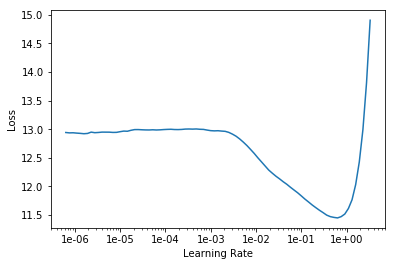

In [21]:
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(1, 1e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.983678,5.882676,0.257941,1:34:09


In [23]:
learn.save('first', with_opt=True)

In [36]:
learn.load('first', with_opt=True);

In [24]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.827884,5.631266,0.271627,1:34:03


In [25]:
learn.save('second', with_opt=True)

In [24]:
learn.load('second', with_opt=True);

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


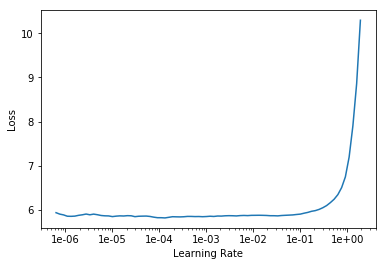

In [27]:
learn.recorder.plot()

In [28]:
learn.fit_one_cycle(2, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.851551,5.629781,0.272251,1:33:39
1,5.892535,5.624079,0.273117,1:33:34


In [29]:
learn.save('third', with_opt=True)

In [40]:
learn.load('third', with_opt=True);

In [ ]:
# can train more but because of computational and time constraints, stopping training of LM here

In [30]:
learn.predict('શાહરૂખ ખાન સાથે',n_words=10)

'શાહરૂખ ખાન સાથે ▁સંકળાયેલા ▁છે نام पना ीय ▁x x bo s ▁'

In [31]:
learn.save_encoder('all_language_enc')

In [22]:
data_clas = TextClasDataBunch.from_csv(path=path, csv_name='all_languages.csv', tokenizer=tokenizer, vocab=all_language_vocab, text_cols=[0], label_cols=label_cols)

In [44]:
data_clas.sanity_check()

In [23]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)

In [24]:
learn.load_encoder('all_language_enc')

In [49]:
learn.freeze()

In [50]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


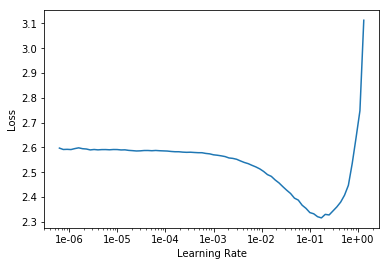

In [51]:
learn.recorder.plot()

In [25]:
learn.loss_func.func

CrossEntropyLoss()

In [26]:
kappa = KappaScore()

In [27]:
learn.metrics = [kappa, accuracy]

In [55]:
learn.fit_one_cycle(1, 1e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,kappa_score,accuracy,time
0,1.065652,0.179854,0.962355,0.965523,14:15


In [56]:
learn.save('first-full')

In [ ]:
learn.load('first-full');

In [57]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,kappa_score,accuracy,time
0,0.144180,0.063209,0.981524,0.983069,16:47


In [58]:
learn.save('second-full')

In [ ]:
learn.load('second-full');

In [59]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,kappa_score,accuracy,time
0,0.054935,0.045349,0.985223,0.986459,39:18


In [60]:
learn.save('final')

In [28]:
learn.load('final');

In [29]:
learn.predict('પ્રિયંકા ચોપડાને પતિ નિક પાસેથી મળી 2.7 કરોડ રૂપિયાની ગિફ્ટ, કિસ કરીને બોલી- લવ યૂ બેબી')

(Category gujarati,
 tensor(1),
 tensor([1.4485e-06, 9.9982e-01, 9.2347e-07, 1.9563e-06, 7.7323e-07, 5.2646e-06,
         3.5136e-06, 2.0966e-06, 4.5271e-06, 1.9427e-06, 1.5063e-04, 1.5353e-06,
         1.3153e-06]))

In [30]:
learn.predict("न्यायदर्शनम् भारतीयदर्शनेषु अन्यतमम्। वैदिकदर्शनेषु ")

(Category sanskrit,
 tensor(10),
 tensor([2.1822e-06, 4.6507e-06, 2.4775e-04, 1.8132e-07, 2.5841e-04, 3.6040e-07,
         9.6289e-05, 1.4272e-04, 4.3829e-07, 8.9928e-06, 9.9924e-01, 7.1982e-07,
         1.4388e-06]))

In [31]:
learn.predict("विकिपीडिया सभी विषयों पर प्रामाणिक और उपयोग, परिवर्तन")

(Category hindi,
 tensor(2),
 tensor([1.9095e-06, 9.9588e-05, 9.9799e-01, 2.2884e-06, 1.0212e-03, 1.9300e-06,
         2.9417e-04, 5.5568e-04, 2.8276e-06, 2.0715e-05, 7.6945e-06, 3.4894e-07,
         7.7071e-07]))

In [32]:
res = learn.predict("বিষয়ক নিবন্ধ তৈরি করতে উইকি লাভস ওমেন ২০১৯ অনলাইন এডিটাথনে যোগ দিন જનકલી નોટો ઓળખવા માટે એક નવી સ્માર્ટફોન એપ આવી")

In [33]:
str(res[0])

'bengali'

In [34]:
defaults.device = torch.device('cpu')
learn.model.eval()
learn.export()